In [1]:
# !pip install pandas numpy matplotlib scikit-learn scipy

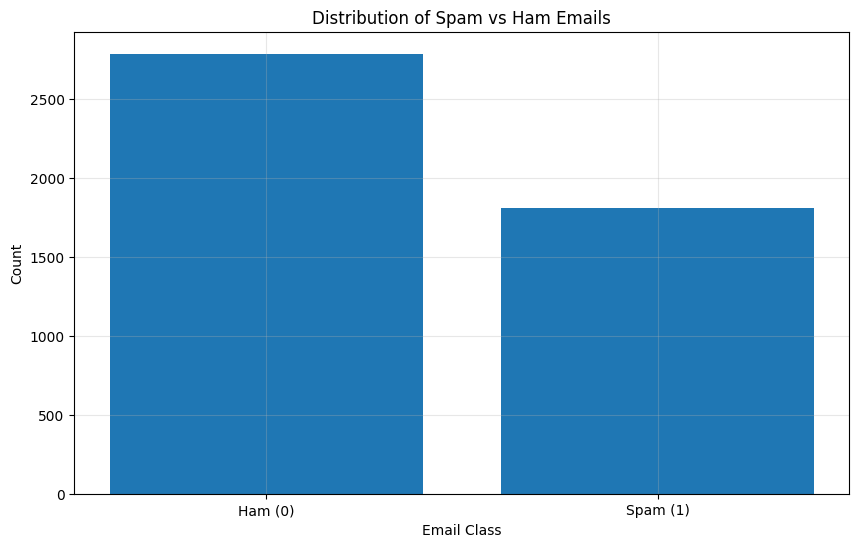

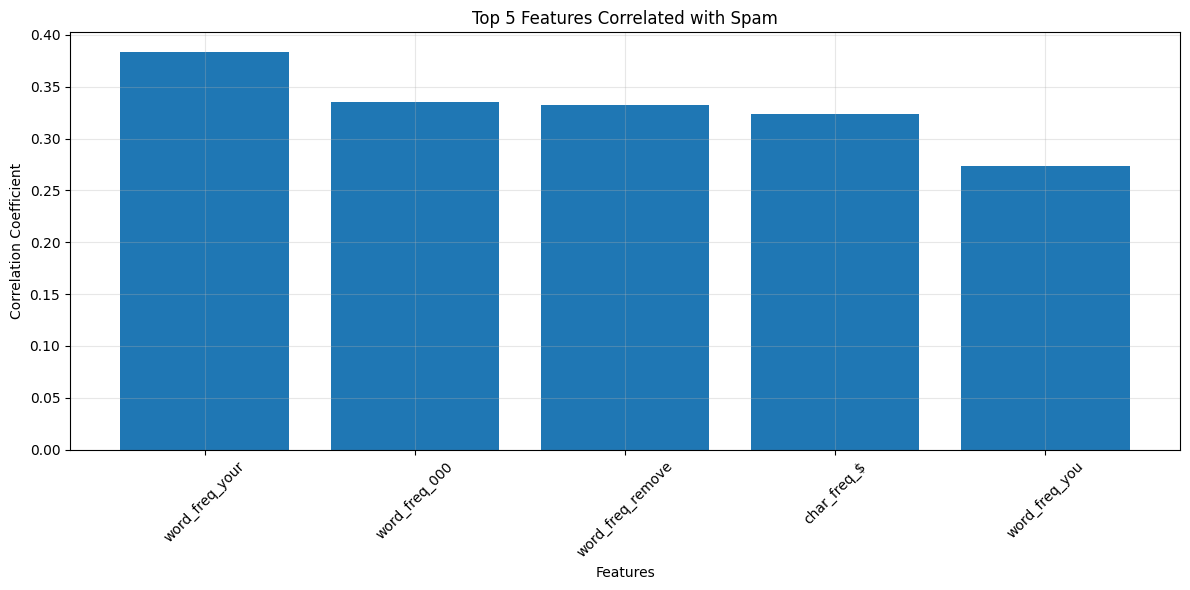

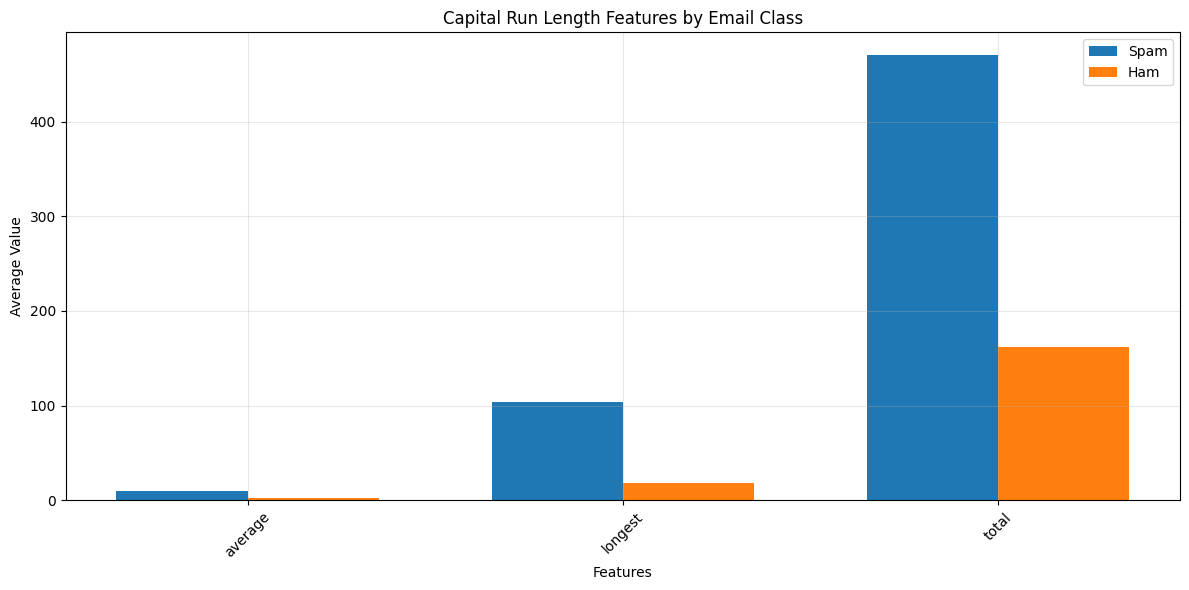

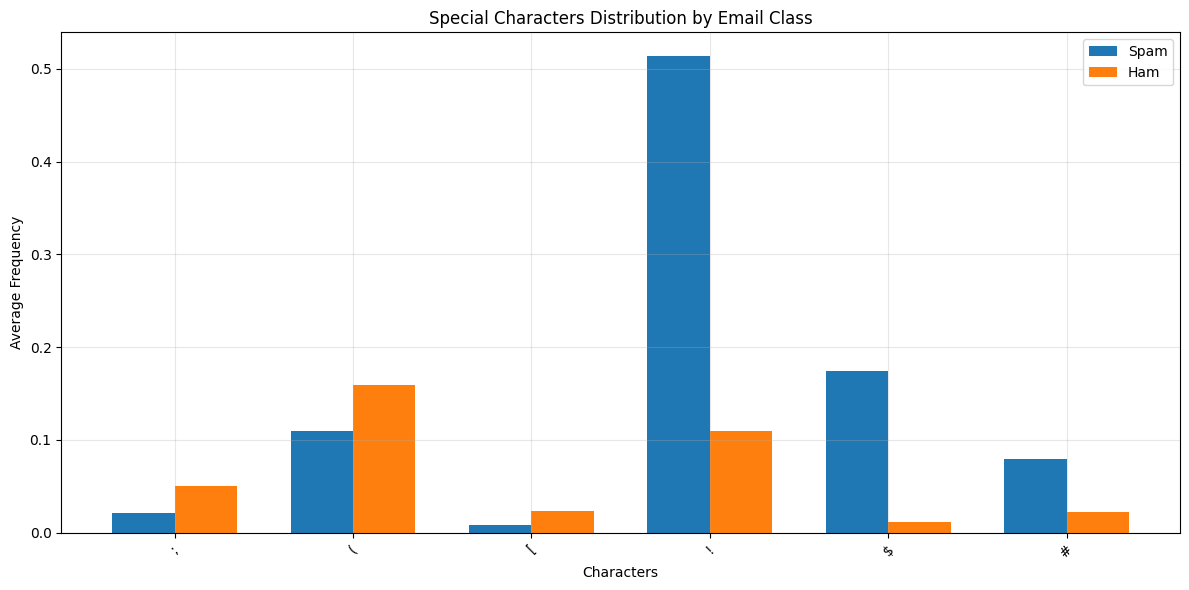

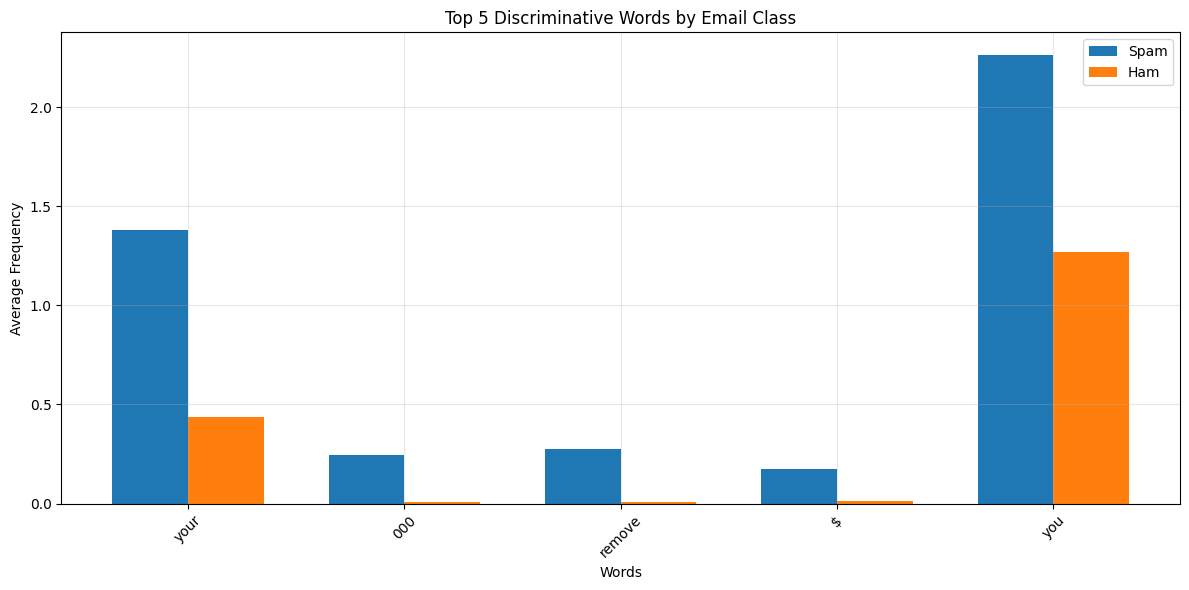


Data Analysis Summary:
--------------------------------------------------

1. Email Distribution:
   - Ham emails: 2788 (60.6%)
   - Spam emails: 1813 (39.4%)

2. Top 5 Features Correlated with Spam:
   - word_freq_your: 0.383
   - word_freq_000: 0.335
   - word_freq_remove: 0.332
   - char_freq_$: 0.324
   - word_freq_you: 0.274

3. Capital Run Length Statistics:
   - capital_run_length_average:
     Spam mean: 9.52
     Ham mean: 2.38
   - capital_run_length_longest:
     Spam mean: 104.39
     Ham mean: 18.21
   - capital_run_length_total:
     Spam mean: 470.62
     Ham mean: 161.47

4. Special Character Frequency:
   - char_freq_;:
     Spam mean: 0.021
     Ham mean: 0.050
   - char_freq_(:
     Spam mean: 0.109
     Ham mean: 0.159
   - char_freq_[:
     Spam mean: 0.008
     Ham mean: 0.023
   - char_freq_!:
     Spam mean: 0.514
     Ham mean: 0.110
   - char_freq_$:
     Spam mean: 0.174
     Ham mean: 0.012
   - char_freq_#:
     Spam mean: 0.079
     Ham mean: 0.022

5. To

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Spambase dataset
# Define column names based on the UCI ML repository documentation
feature_names = [
    # Word frequencies
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
    'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
    'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
    'word_freq_conference',
    # Char frequencies
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    # Capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'spam'
]

# Load the data
data = pd.read_csv('spambase.data', names=feature_names)

# 1. Distribution of Spam vs Ham Emails
plt.figure(figsize=(10, 6))
spam_counts = data['spam'].value_counts()
plt.bar(['Ham (0)', 'Spam (1)'], spam_counts.values)
plt.title('Distribution of Spam vs Ham Emails')
plt.xlabel('Email Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Top 5 Correlations with Spam
correlations = data.corr()['spam'].sort_values(ascending=False)
top_features = correlations[1:6]  # Top 5 excluding spam itself

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_features)), top_features.values)
plt.xticks(range(len(top_features)), top_features.index, rotation=45)
plt.title('Top 5 Features Correlated with Spam')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Capital Run Length Features Comparison
capital_features = ['capital_run_length_average', 
                   'capital_run_length_longest', 
                   'capital_run_length_total']

plt.figure(figsize=(12, 6))
x = np.arange(len(capital_features))
width = 0.35

spam_means = [data[data['spam']==1][feat].mean() for feat in capital_features]
ham_means = [data[data['spam']==0][feat].mean() for feat in capital_features]

plt.bar(x - width/2, spam_means, width, label='Spam')
plt.bar(x + width/2, ham_means, width, label='Ham')

plt.title('Capital Run Length Features by Email Class')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(x, [feat.split('_')[-1] for feat in capital_features], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Special Characters Distribution
special_chars = ['char_freq_;', 'char_freq_(', 
                'char_freq_[', 'char_freq_!', 
                'char_freq_$', 'char_freq_#']

plt.figure(figsize=(12, 6))
x = np.arange(len(special_chars))
width = 0.35

spam_means = [data[data['spam']==1][char].mean() for char in special_chars]
ham_means = [data[data['spam']==0][char].mean() for char in special_chars]

plt.bar(x - width/2, spam_means, width, label='Spam')
plt.bar(x + width/2, ham_means, width, label='Ham')

plt.title('Special Characters Distribution by Email Class')
plt.xlabel('Characters')
plt.ylabel('Average Frequency')
plt.xticks(x, [char.split('_')[-1] for char in special_chars], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Word Frequency Comparison for Top Spam Words
top_spam_words = correlations[1:6].index
plt.figure(figsize=(12, 6))
x = np.arange(len(top_spam_words))
width = 0.35

spam_means = [data[data['spam']==1][word].mean() for word in top_spam_words]
ham_means = [data[data['spam']==0][word].mean() for word in top_spam_words]

plt.bar(x - width/2, spam_means, width, label='Spam')
plt.bar(x + width/2, ham_means, width, label='Ham')

plt.title('Top 5 Discriminative Words by Email Class')
plt.xlabel('Words')
plt.ylabel('Average Frequency')
plt.xticks(x, [word.split('_')[-1] for word in top_spam_words], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nData Analysis Summary:")
print("-" * 50)

# 1. Spam Distribution
spam_count = data['spam'].value_counts()
print(f"\n1. Email Distribution:")
print(f"   - Ham emails: {spam_count[0]} ({spam_count[0]/len(data)*100:.1f}%)")
print(f"   - Spam emails: {spam_count[1]} ({spam_count[1]/len(data)*100:.1f}%)")

# 2. Top Correlations
print(f"\n2. Top 5 Features Correlated with Spam:")
for feature, corr in correlations[1:6].items():
    print(f"   - {feature}: {corr:.3f}")

# 3. Capital Run Length Statistics
print(f"\n3. Capital Run Length Statistics:")
for feature in capital_features:
    spam_mean = data[data['spam']==1][feature].mean()
    ham_mean = data[data['spam']==0][feature].mean()
    print(f"   - {feature}:")
    print(f"     Spam mean: {spam_mean:.2f}")
    print(f"     Ham mean: {ham_mean:.2f}")

# 4. Special Character Analysis
print(f"\n4. Special Character Frequency:")
for char in special_chars:
    spam_mean = data[data['spam']==1][char].mean()
    ham_mean = data[data['spam']==0][char].mean()
    print(f"   - {char}:")
    print(f"     Spam mean: {spam_mean:.3f}")
    print(f"     Ham mean: {ham_mean:.3f}")

# 5. Word Frequency Analysis
print(f"\n5. Top Spam-Indicating Words:")
for word in top_spam_words:
    spam_mean = data[data['spam']==1][word].mean()
    ham_mean = data[data['spam']==0][word].mean()
    print(f"   - {word}:")
    print(f"     Spam mean: {spam_mean:.3f}")
    print(f"     Ham mean: {ham_mean:.3f}")

In [3]:
# Assess the data:

import pandas as pd
import numpy as np

# Load the dataset
feature_names = [
    # Word frequencies
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    # ... [previous feature names list] ...
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'spam'
]
data = pd.read_csv('spambase.data', names=feature_names)

# Basic dataset information
print("Dataset Shape:", data.shape)
print("\nMissing Values:")
print(data.isnull().sum().sum())
print("\nFeature Statistics:")
print(data.describe())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for feature ranges
print("\nFeature Ranges:")
for column in data.columns:
    print(f"{column}: [{data[column].min():.2f}, {data[column].max():.2f}]")

# Actual Preprocessing Function

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_spambase(data):
    # 1. Remove duplicates if any
    data = data.drop_duplicates()
    
    # 2. Split features and target
    X = data.drop('spam', axis=1)
    y = data['spam']
    
    # 3. Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    # 4. Create new features
    X_scaled['total_special_chars'] = X_scaled[[col for col in X.columns 
                                               if 'char_freq_' in col]].sum(axis=1)
    
    # 5. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    return X_train, X_test, y_train, y_test, scaler


Dataset Shape: (4601, 8)

Missing Values:
0

Feature Statistics:
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.016976           0.269071       0.075811      0.044238   
std          0.109394           0.815672       0.245882      0.429342   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.315000       0.052000      0.000000   
max          4.081000          32.478000       6.003000     19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 4601.000000                 4601.000000   
mean                     5.191515                   52.172789   
std                     31.729449                  194.891310   
min              


Gradient Boosting Results:
--------------------------------------------------

Confusion Matrix:
[[411  40]
 [ 53 278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       451
           1       0.87      0.84      0.86       331

    accuracy                           0.88       782
   macro avg       0.88      0.88      0.88       782
weighted avg       0.88      0.88      0.88       782


Additional Metrics:
Specificity (True Negative Rate): 0.9113
Sensitivity (True Positive Rate): 0.8399
False Positive Rate (FPR): 0.0887
Area Under ROC Curve (AUC): 0.9391


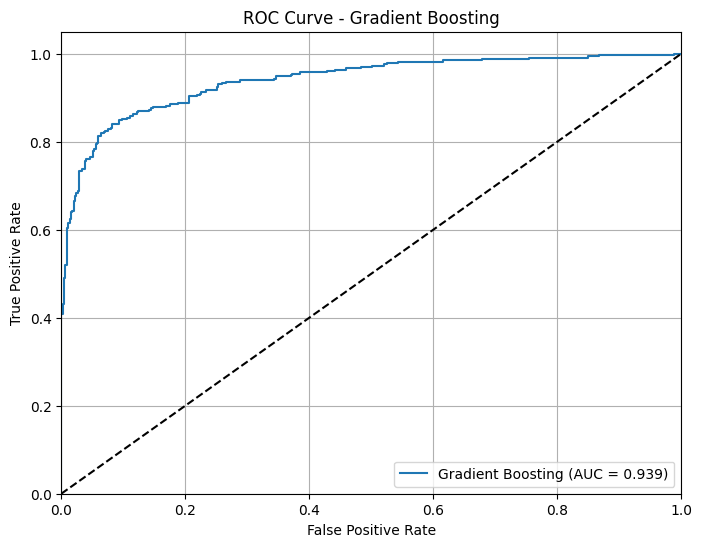


Random Forest Results:
--------------------------------------------------

Confusion Matrix:
[[423  28]
 [ 61 270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       451
           1       0.91      0.82      0.86       331

    accuracy                           0.89       782
   macro avg       0.89      0.88      0.88       782
weighted avg       0.89      0.89      0.89       782


Additional Metrics:
Specificity (True Negative Rate): 0.9379
Sensitivity (True Positive Rate): 0.8157
False Positive Rate (FPR): 0.0621
Area Under ROC Curve (AUC): 0.9448


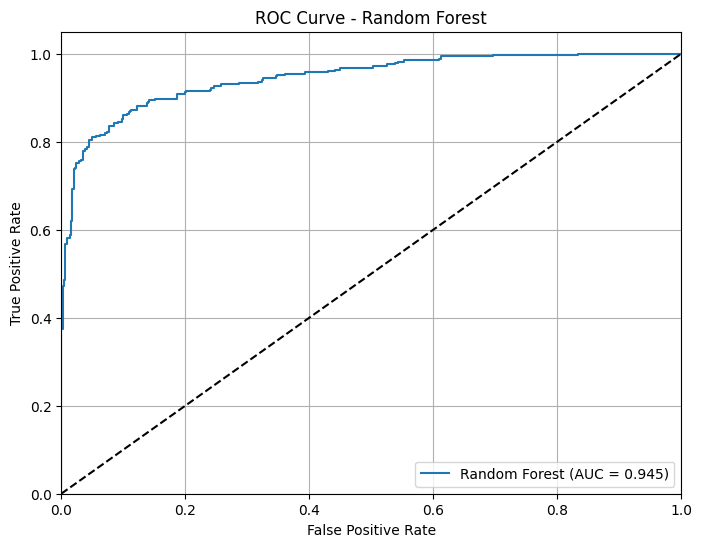


Cross-validation Results:
--------------------------------------------------
Gradient Boosting CV Scores: [0.8658147  0.88977636 0.85782748 0.8448     0.8608    ]
Gradient Boosting CV Mean: 0.8638 (+/- 0.0295)

Random Forest CV Scores: [0.85942492 0.88019169 0.87220447 0.8432     0.8768    ]
Random Forest CV Mean: 0.8664 (+/- 0.0271)

Model Comparison Summary:
--------------------------------------------------
Gradient Boosting:
- Test Accuracy: 0.8811
- AUC Score: 0.9391

Random Forest:
- Test Accuracy: 0.8862
- AUC Score: 0.9448


In [6]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# import xgboost as xgb
# import lightgbm as lgb
import matplotlib.pyplot as plt

# Load data and preprocess
data = pd.read_csv('spambase.data', names=feature_names)
X_train, X_test, y_train, y_test, scaler = preprocess_spambase(data)


# Model Parameters
gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'subsample': 0.8,
    'random_state': 42
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'random_state': 42
}

# Train models
gb_model = GradientBoostingClassifier(**gb_params)
rf_model = RandomForestClassifier(**rf_params)

gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Get probability predictions for AUC
gb_prob = gb_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Enhanced evaluation function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n{model_name} Results:")
    print("-" * 50)
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    fpr = fp / (fp + tn)  # False Positive Rate
    auc = roc_auc_score(y_true, y_prob)  # AUC Score
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    print("\nAdditional Metrics:")
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")
    print(f"Area Under ROC Curve (AUC): {auc:.4f}")
    
    # Plot ROC Curve
    fpr_curve, tpr_curve, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_curve, tpr_curve, label=f'{model_name} (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return accuracy_score(y_true, y_pred), auc

# Evaluate both models
gb_accuracy, gb_auc = evaluate_model(y_test, gb_pred, gb_prob, "Gradient Boosting")
rf_accuracy, rf_auc = evaluate_model(y_test, rf_pred, rf_prob, "Random Forest")

# Cross-validation scores
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print("\nCross-validation Results:")
print("-" * 50)
print(f"Gradient Boosting CV Scores: {gb_cv_scores}")
print(f"Gradient Boosting CV Mean: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std() * 2:.4f})")
print(f"\nRandom Forest CV Scores: {rf_cv_scores}")
print(f"Random Forest CV Mean: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Model comparison summary
print("\nModel Comparison Summary:")
print("-" * 50)
print(f"Gradient Boosting:")
print(f"- Test Accuracy: {gb_accuracy:.4f}")
print(f"- AUC Score: {gb_auc:.4f}")
print(f"\nRandom Forest:")
print(f"- Test Accuracy: {rf_accuracy:.4f}")
print(f"- AUC Score: {rf_auc:.4f}")

In [7]:
from sklearn.model_selection import GridSearchCV
# Random Forest Parameter Grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Gradient Boosting Parameter Grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 6],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9]
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gb_grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the models
print("Training Random Forest...")
rf_grid_search.fit(X_train, y_train)

print("\nTraining Gradient Boosting...")
gb_grid_search.fit(X_train, y_train)

# Function to display results
def display_results(grid_search, model_name):
    print(f"\n{model_name} Best Parameters:")
    print(grid_search.best_params_)
    print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.4f}")
    
    # Make predictions with best model
    y_pred = grid_search.best_estimator_.predict(X_test)
    y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    
    print("\nTest Set Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Additional metrics
    auc = roc_auc_score(y_test, y_prob)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print("\nAdditional Metrics:")
    print(f"AUC: {auc:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")

# Display results for both models
display_results(rf_grid_search, "Random Forest")
display_results(gb_grid_search, "Gradient Boosting")

# Compare with original results
print("\nImprovement Analysis:")
print("-" * 50)
print("Random Forest:")
print(f"Original AUC: 0.9448")
print(f"Tuned AUC: {roc_auc_score(y_test, rf_grid_search.best_estimator_.predict_proba(X_test)[:, 1]):.4f}")

print("\nGradient Boosting:")
print(f"Original AUC: 0.9391")
print(f"Tuned AUC: {roc_auc_score(y_test, gb_grid_search.best_estimator_.predict_proba(X_test)[:, 1]):.4f}")

Training Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Training Gradient Boosting...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Random Forest Best Parameters:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Best Cross-Validation Score: 0.9221

Test Set Performance:
Confusion Matrix:
[[422  29]
 [ 59 272]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       451
           1       0.90      0.82      0.86       331

    accuracy                           0.89       782
   macro avg       0.89      0.88      0.88       782
weighted avg       0.89      0.89      0.89       782


Additional Metrics:
AUC: 0.9443
Specificity: 0.9357
Sensitivity: 0.8218
False Positive Rate: 0.0643

Gradient Boosting Best Parameters:
{'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 